# 2. Exploratory Data Analysis

In [49]:
import matplotlib.pyplot as plt

2.1 Load cleaned dataset

In [50]:
import pandas as pd

# load the dataset
dataset_cleaned = pd.read_csv('/Users/mehmetkursatgonc/Documents/DSS Folders/Thesis Folders/Kürşat Thesis/Thesis_Data_and_Coding_Files/GitHub_Repository/cleaned_dataset_v1.csv')

2.2 Basic info

In [51]:
# Check the first few rows
print(dataset_cleaned.head())

# Check the structure of the dataset
print(dataset_cleaned.info())

# Check for missing values
print(dataset_cleaned.isnull().sum())

                         title  metascore  userscore  \
0                       #IDARB      77.00  69.000000   
1                'Splosion Man      84.00  78.000000   
2                     .detuned      46.00  37.000000   
3      .hack//G.U. Last Recode      74.25  81.704082   
4  .hack//G.U. vol. 1//Rebirth      69.00  80.000000   

                                              genre          platforms  \
0  Action, General, Miscellaneous, Party / Minigame           Xbox One   
1                   2D, Action, General, Platformer           Xbox 360   
2              Action, Miscellaneous, Music, Rhythm      PlayStation 3   
3                        Compilation, Miscellaneous  PC, PlayStation 4   
4                          Action RPG, Role-Playing      PlayStation 2   

                 developer esrb_rating                    num_players  \
0  Other Ocean Interactive           E                       1 Player   
1      Twisted Pixel Games        E10+  1-4 Players, 4 Players Online   

2.3 Set Working Directory

In [52]:
# Use a relative path or set a base directory
import os

base_dir = "/Users/mehmetkursatgonc/Documents/DSS Folders/Thesis Folders/Kürşat Thesis/Thesis_Data_and_Coding_Files/GitHub_Repository"
file_name = "cleaned_dataset_v1.csv"
file_path = os.path.join(base_dir, file_name)

# Load the dataset
dataset_cleaned = pd.read_csv(file_path)

2.4 Numerical feature summary

In [53]:
# Descriptive statistics for numerical columns
print("Numerical Feature Summary:")
print(dataset_cleaned.describe())

Numerical Feature Summary:
          metascore     userscore  release_year
count  11665.000000  11665.000000  11665.000000
mean      70.463238     70.287177   2010.915731
std       12.389303     13.236141      6.271835
min       11.000000      3.306272   1995.000000
25%       64.000000     64.000000   2006.000000
50%       72.275862     73.000000   2011.000000
75%       79.041667     79.447368   2016.000000
max       99.000000     97.000000   2022.000000


2.5 Frequency analysis for categorical features


Frequency Analysis for genre:
genre
2D, Action, Platformer                           451
Action RPG, Role-Playing                         422
Action, General                                  253
Adventure, General                               250
3D, Action, Platformer                           216
Action Adventure, General                        188
3D, Action, Fighting                             170
Action, Arcade, First-Person, Sci-Fi, Shooter    169
Compilation, Miscellaneous                       158
2D, Action, Fighting                             120
Name: count, dtype: int64

Frequency Analysis for platforms:
platforms
PC                             2719
PlayStation 4                   610
PlayStation 2                   609
Switch                          591
Xbox 360                        537
DS                              429
PC, PlayStation 4, Xbox One     366
Wii                             339
3DS                             318
PlayStation 3, Xbox 360         306
Na

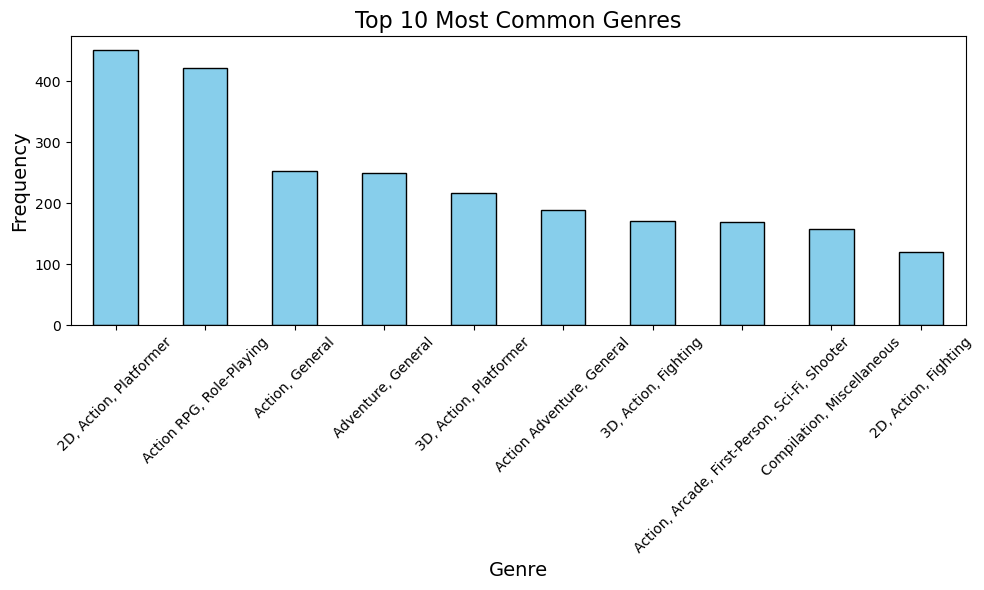

In [54]:
# Frequency analysis for categorical features
categorical_columns = ['genre', 'platforms', 'developer', 'esrb_rating']

for col in categorical_columns:
    print(f"\nFrequency Analysis for {col}:")
    print(dataset_cleaned[col].value_counts().head(10))  # Top 10 categories

# Visualize most common genres
top_genres = dataset_cleaned['genre'].value_counts().head(10)
top_genres.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title("Top 10 Most Common Genres", fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2.6 Metascore and Userscore Distribution

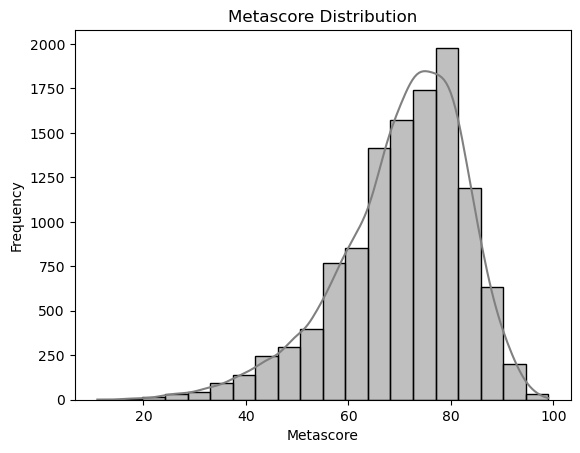

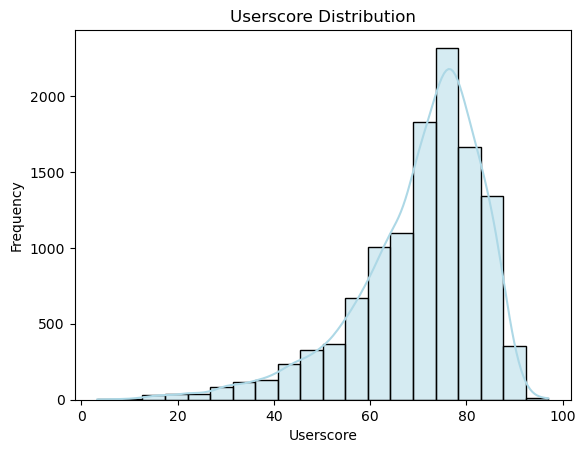

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(dataset_cleaned['metascore'], kde=True, bins=20, color='gray')
plt.title("Metascore Distribution")
plt.xlabel("Metascore")
plt.ylabel("Frequency")
plt.show()

sns.histplot(dataset_cleaned['userscore'], kde=True, bins=20, color='lightblue')
plt.title("Userscore Distribution")
plt.xlabel("Userscore")
plt.ylabel("Frequency")
plt.show()

2.6 Average Scores by Release Year and Decade

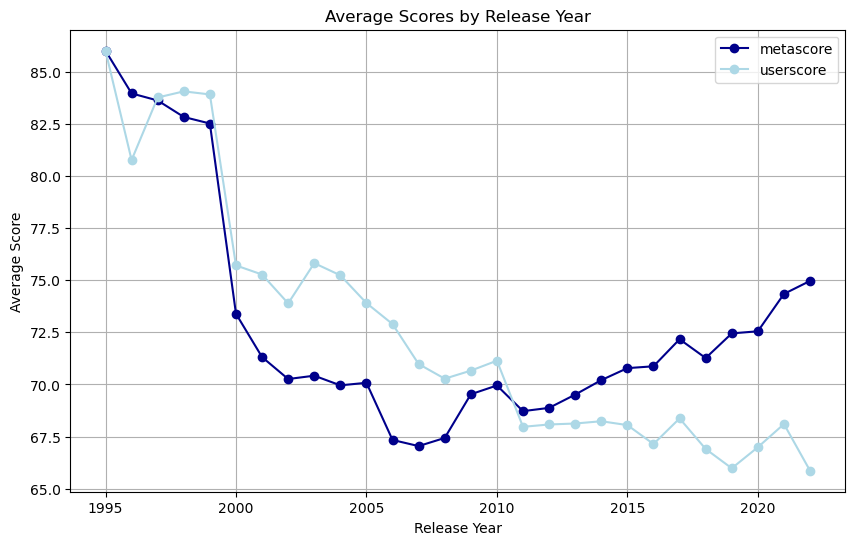

In [56]:
import matplotlib.pyplot as plt

# Group data by release year and calculate mean scores
avg_scores_by_year = dataset_cleaned.groupby('release_year')[['metascore', 'userscore']].mean()

# Plot with custom colors for the lines
avg_scores_by_year.plot(
    kind='line', 
    marker='o', 
    figsize=(10, 6), 
    color={'metascore': 'darkblue', 'userscore': 'lightblue'}
)

# Add title and labels
plt.title("Average Scores by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Score")
plt.grid()

# Display the plot
plt.show()

2.7 Numerical Columns Analysis

In [57]:
# Extract only numerical columns
numerical_features = dataset_cleaned.select_dtypes(include=['float64', 'int64'])
print("Numerical Features:")
print(numerical_features.head())

Numerical Features:
   metascore  userscore  release_year
0      77.00  69.000000          2015
1      84.00  78.000000          2009
2      46.00  37.000000          2009
3      74.25  81.704082          2017
4      69.00  80.000000          2006


* Correlation matrix

Correlation Matrix:
              metascore  userscore  release_year
metascore      1.000000   0.557528      0.046306
userscore      0.557528   1.000000     -0.234027
release_year   0.046306  -0.234027      1.000000


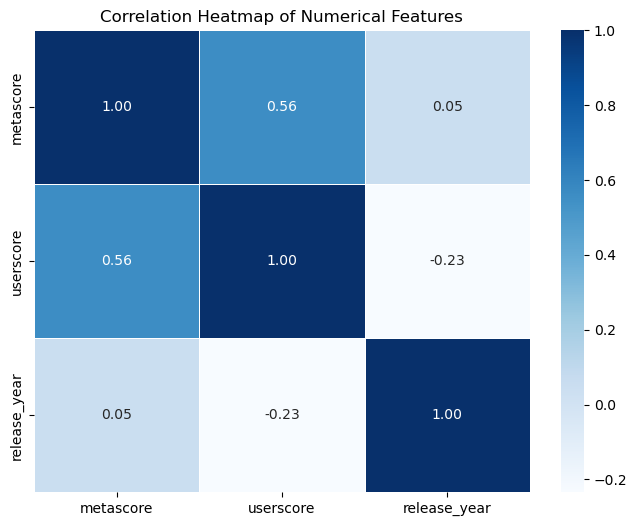

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = numerical_features.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

2.8 Pairwise Scatterplot for both targets

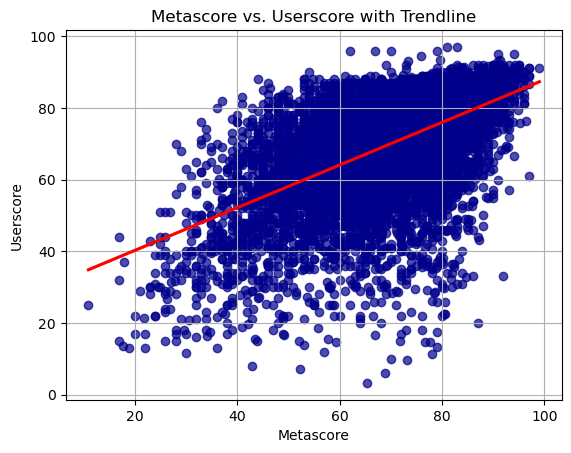

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot with a trendline
sns.regplot(
    x='metascore', 
    y='userscore', 
    data=dataset_cleaned, 
    scatter_kws={'alpha': 0.7, 'color': 'darkblue'},  # Customize scatter plot appearance
    line_kws={'color': 'red'},  # Customize trendline appearance
    ci=None  # Removes confidence intervals around the trendline
)

# Add title and labels
plt.title("Metascore vs. Userscore with Trendline")
plt.xlabel("Metascore")
plt.ylabel("Userscore")
plt.grid()

# Display the plot
plt.show()

2.9 Distribution of Developers (Top 10 by Frequency)

Top 10 Developers by Frequency:
developer
Capcom              164
Nintendo            141
Telltale Games      117
Konami               88
Square Enix          77
Ubisoft              68
Omega Force          56
EA Canada            55
Ubisoft Montreal     52
EA Sports            51
Name: count, dtype: int64


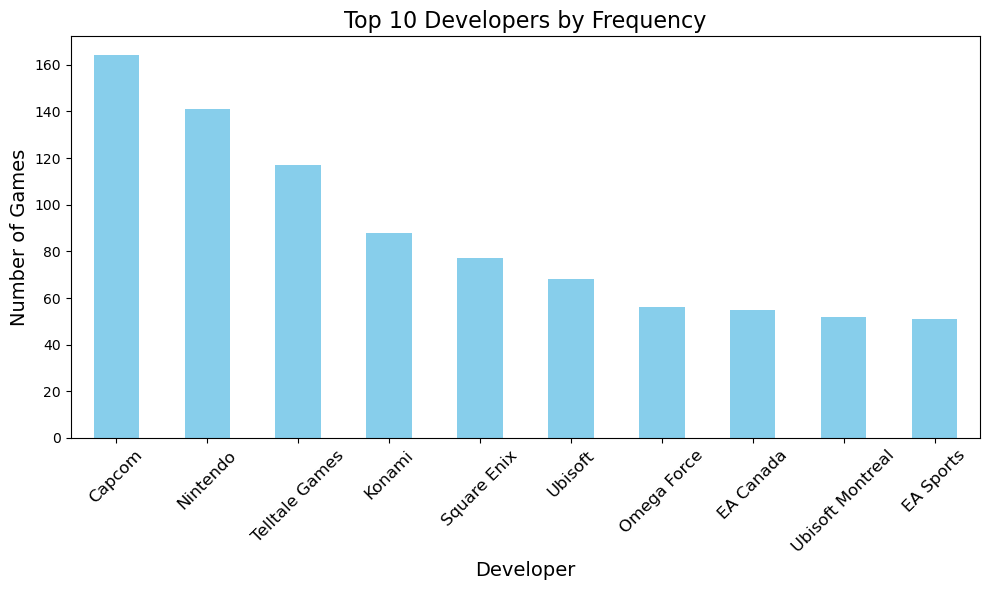

In [60]:
# Top 10 developers by frequency
top_developers = dataset_cleaned['developer'].value_counts().head(10)

print("Top 10 Developers by Frequency:")
print(top_developers)

# Bar plot for visualization
top_developers.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Top 10 Developers by Frequency", fontsize=16)
plt.xlabel("Developer", fontsize=14)
plt.ylabel("Number of Games", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

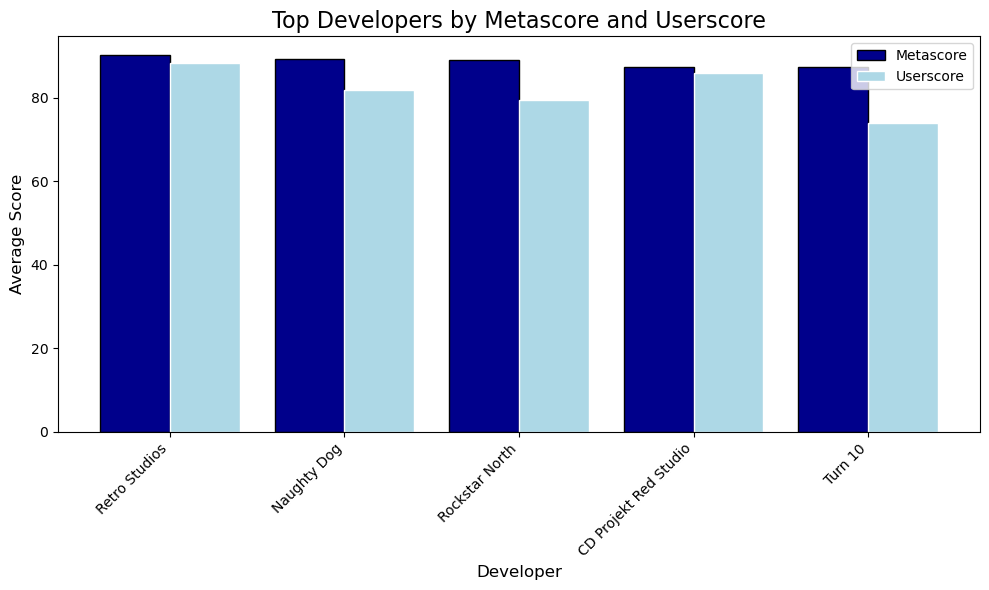

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter developers with at least 5 games
developer_counts = dataset_cleaned['developer'].value_counts()
valid_developers = developer_counts[developer_counts >= 5].index
filtered_dataset = dataset_cleaned[dataset_cleaned['developer'].isin(valid_developers)]

# Compute top developers for metascore and userscore
top_developers = (
    filtered_dataset.groupby('developer')[['metascore', 'userscore']]
    .mean()
    .sort_values(by='metascore', ascending=False)
    .head(5)
)

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(top_developers))
width = 0.4

ax.bar(x, top_developers['metascore'], width, label='Metascore', color='darkblue', edgecolor='black')
ax.bar([i + width for i in x], top_developers['userscore'], width, label='Userscore', color='lightblue', edgecolor='white')

ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(top_developers.index, rotation=45, ha='right', fontsize=10)
ax.set_title('Top Developers by Metascore and Userscore', fontsize=16)
ax.set_ylabel('Average Score', fontsize=12)
ax.set_xlabel('Developer', fontsize=12)
ax.legend()
plt.tight_layout()
plt.show()

2.10 Top Developers

In [62]:
# Prepare the data
top_developers = (
    filtered_dataset.groupby('developer')[['metascore', 'userscore']]
    .mean()
    .sort_values(by='metascore', ascending=False)
    .head(5)
)

# Display the table
print(top_developers)

                       metascore  userscore
developer                                  
Retro Studios          90.246711  88.281467
Naughty Dog            89.428571  81.785714
Rockstar North         89.206373  79.413073
CD Projekt Red Studio  87.503943  85.860963
Turn 10                87.381944  74.109141


2.11 Textual feature summary distribution and frequency analysis

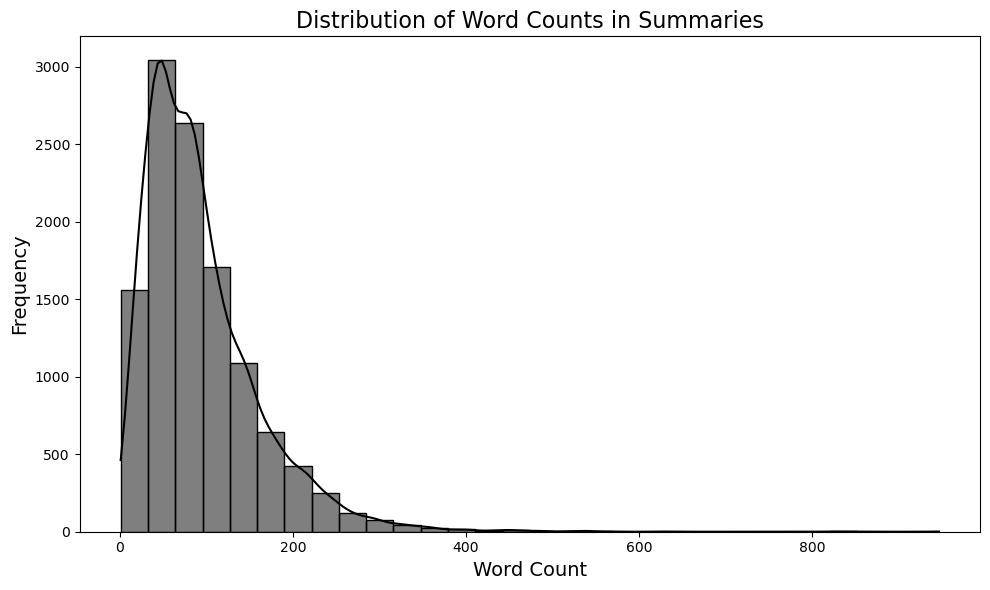

In [63]:
# Word count in summaries
dataset_cleaned['summary_word_count'] = dataset_cleaned['summary'].apply(lambda x: len(x.split()))

# Plot distribution of word counts
plt.figure(figsize=(10, 6))
sns.histplot(dataset_cleaned['summary_word_count'], bins=30, color='black', kde=True)
plt.title("Distribution of Word Counts in Summaries", fontsize=16)
plt.xlabel("Word Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()

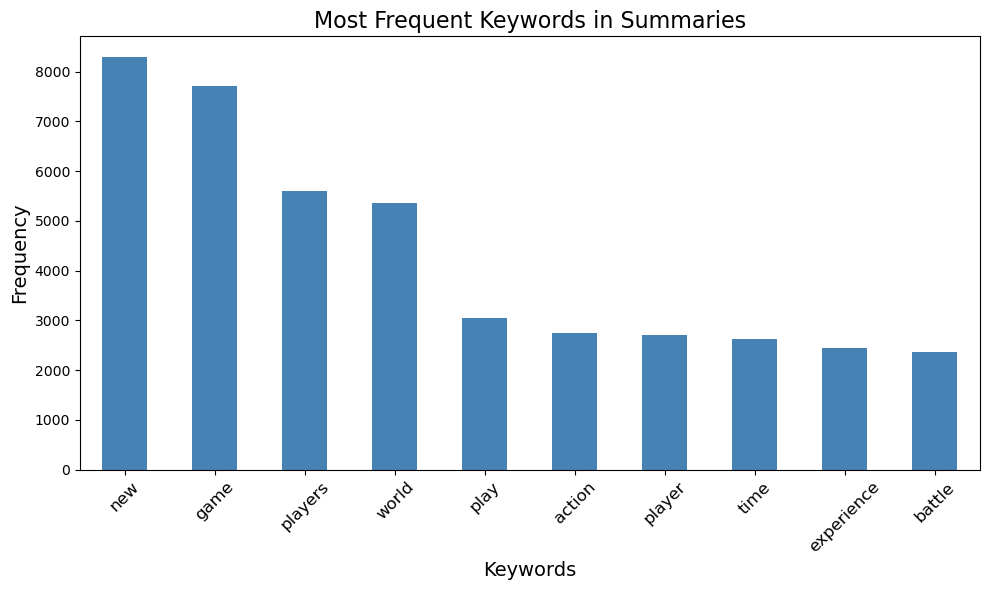

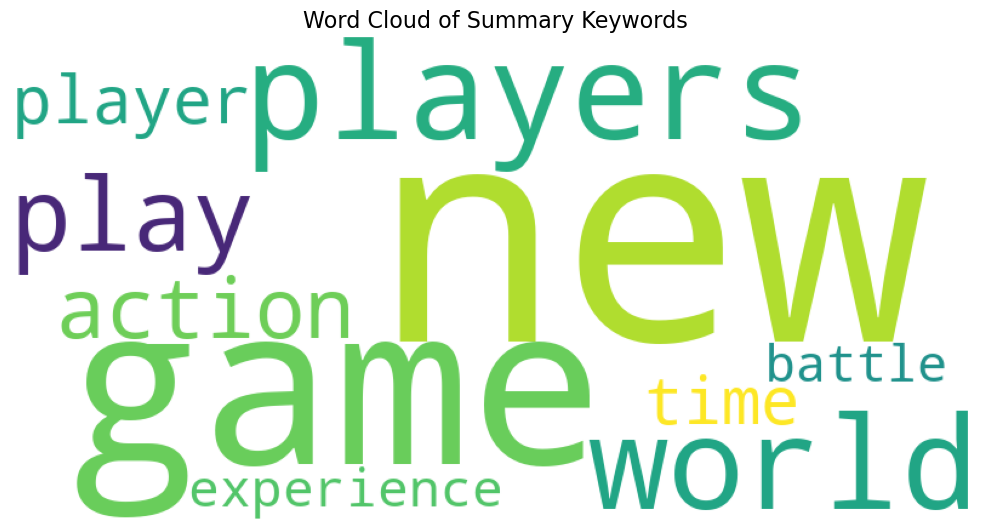

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Use CountVectorizer to extract most frequent words
vectorizer = CountVectorizer(stop_words='english', max_features=10)
word_counts = vectorizer.fit_transform(dataset_cleaned['summary'])
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).A1))

# Bar chart of most frequent words
pd.Series(word_freq).sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='steelblue')
plt.title("Most Frequent Keywords in Summaries", fontsize=16)
plt.xlabel("Keywords", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Word cloud visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='kaiser')
plt.axis('off')
plt.title("Word Cloud of Summary Keywords", fontsize=16)
plt.tight_layout()
plt.show()